In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys

if not os.path.join(os.path.abspath(''), '../') in sys.path:
    sys.path.append(os.path.join(os.path.abspath(''), '../'))
    
from utils.classification import load_behaviors, load_data
from utils.meta import *
import matplotlib
import warnings
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches

### load predicted behaviors

In [6]:
poses = load_data('../processed_dataset/raw_data_study5.pkl')

## Group-Condition - Distance Traveled Stat + Heatmap

In [17]:
import csv
import numpy as np

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

project = 'oprm1_reexpress'
# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_study = 'Morphine'
selected_group = 'Female'
selected_condition = 'Experimental'

# Conversion factor from pixels to units
pixels_to_units = 0.0330828  # meters = 0.000330708, cm = 0.0330828
unit = 'cm'

# Assuming poses is a dictionary containing pose data for different groups and conditions
# Example structure: poses[group][condition][file][frame][bodypart_idx]
poses_selected = poses[selected_study][selected_group][selected_condition]

# Initialize a list to store distances traveled for each file
distances_traveled = []

# Initialize cumulative distance traveled
cumulative_distance_traveled = 0.0

for file_key in poses_selected:
    pose_data = poses_selected[file_key]
    total_distance_pixels = 0.0
    for frame in range(1, len(pose_data)):
        # Calculate Euclidean distance between consecutive frames in pixels
        distance_pixels = np.linalg.norm(pose_data[frame][bodypart_idx:bodypart_idx+2] - pose_data[frame-1][bodypart_idx:bodypart_idx+2])
        total_distance_pixels += distance_pixels
    # Convert total distance from pixels to units
    total_distance = total_distance_pixels * pixels_to_units
    # Append to list and update cumulative distance traveled
    distances_traveled.append(total_distance)
    cumulative_distance_traveled += total_distance

# Convert list to numpy array for easier computation
distances_traveled = np.array(distances_traveled)

# Calculate statistics
average_distance = np.mean(distances_traveled)
standard_deviation = np.std(distances_traveled)
sem = standard_deviation / np.sqrt(len(distances_traveled))

# Print results
print(f"Average distance traveled for study '{selected_study}' and group '{selected_group}' and condition '{selected_condition}': {average_distance:.2f} {unit}")
print(f"Standard deviation: {standard_deviation:.2f} {unit}")
print(f"Standard error of the mean (SEM): {sem:.2f} {unit}")
print(f"Cumulative distance traveled: {cumulative_distance_traveled:.2f} {unit}")

# Save statistics to CSV
output_filename = f'../processed_dataset/behavior_distance-traveled/behavior_distance_stats-{unit}_{selected_study}_{selected_group}_{selected_condition}_{project}.csv'
with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Statistic', 'Value'])
    writer.writerow(['Average distance traveled', f'{average_distance:.2f} {unit}'])
    writer.writerow(['Standard deviation', f'{standard_deviation:.2f} {unit}'])
    writer.writerow(['Standard error of the mean (SEM)', f'{sem:.2f} {unit}'])
    writer.writerow(['Cumulative distance traveled', f'{cumulative_distance_traveled:.2f} {unit}'])

Average distance traveled for study 'Morphine' and group 'Female' and condition 'Experimental': 10403.06 cm
Standard deviation: 910.86 cm
Standard error of the mean (SEM): 371.86 cm
Cumulative distance traveled: 62418.36 cm


## HEATMAP Distance Traveled Figure!

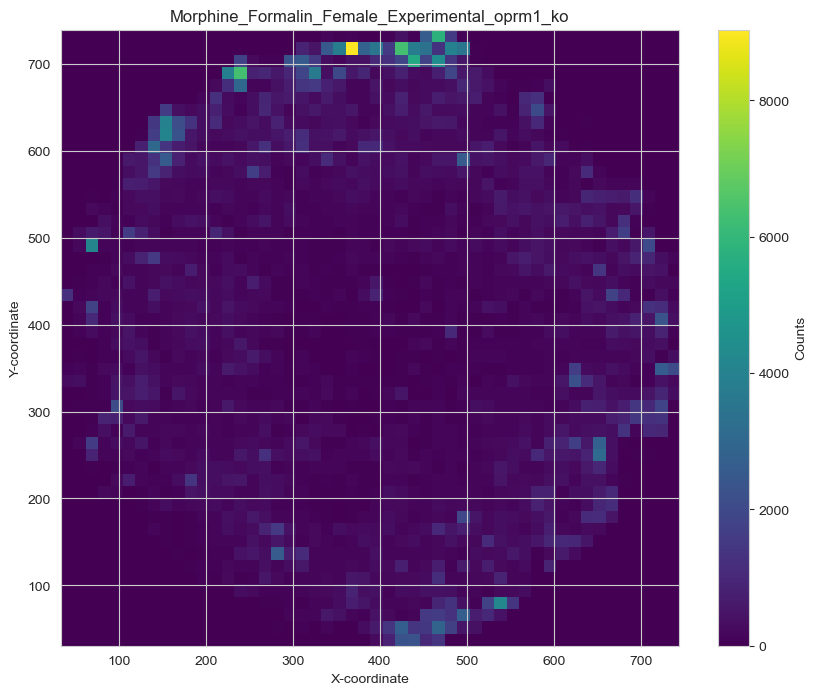

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Example pose dataset (x, y coordinates of tailbase) for selected_group_1 and selected_condition_1
project = 'oprm1_ko'
# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_study = 'Morphine_Formalin'
selected_group = 'Female'
selected_condition = 'Experimental'

# Assuming poses is a dictionary containing pose data for different groups and conditions
# Example structure: poses[group][condition][file][frame][bodypart_idx]
poses_selected = poses[selected_study][selected_group][selected_condition]

# Create a list to store x and y coordinates
x_coords = []
y_coords = []

for file_key in poses_selected:
    pose_data = poses_selected[file_key]
    for frame in range(1, len(pose_data)):
        x_coords.append(pose_data[frame][bodypart_idx])
        y_coords.append(pose_data[frame][bodypart_idx + 1])

# Create a heatmap
heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 8))
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Counts')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title(f'{selected_study}_{selected_group}_{selected_condition}_{project}')

# Save the figure as SVG
plt.savefig('heatmap.svg', format='svg')
plt.savefig(f'../figures/behavior_distance-heatmap_{selected_study}_{selected_group}_{selected_condition}_{project}.svg', format='svg')
plt.show()

#### HEATMAP - SidebySide

KeyError: 'Combined'

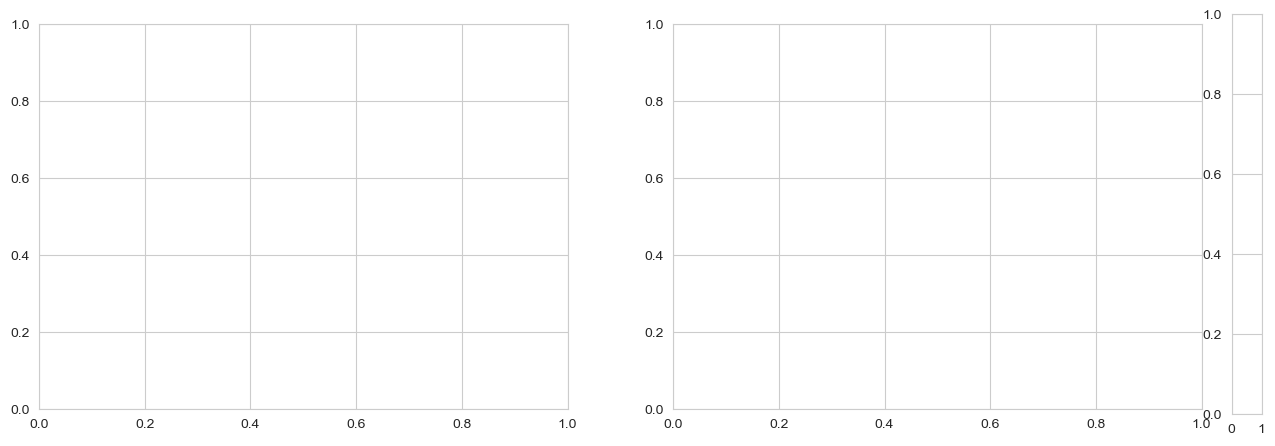

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Example pose dataset (x, y coordinates of tailbase) for selected_group_1 and selected_condition_1
project = 'oprm1_reexp'
# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_condition = 'Experimental'
selected_groups = ['Male', 'Female', 'Combined']

# Create a figure for the heatmap
plt.figure(figsize=(15, 5))

# Define a colorbar
cbar_ax = plt.axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]

# Define the number of subplots based on the number of selected groups
num_subplots = len(selected_groups)

# Create an array of axes objects for each subplot
axs = [plt.subplot(1, num_subplots, i + 1) for i in range(num_subplots)]

# Loop through selected groups and plot the heatmaps
for idx, (selected_group, ax) in enumerate(zip(selected_groups, axs), start=1):
    # Assuming poses is a dictionary containing pose data for different groups and conditions
    # Example structure: poses[group][condition][file][frame][bodypart_idx]
    poses_selected = poses[selected_group][selected_condition]

    # Create a list to store x and y coordinates
    x_coords = []
    y_coords = []

    for file_key in poses_selected:
        pose_data = poses_selected[file_key]
        for frame in range(1, len(pose_data)):
            x_coords.append(pose_data[frame][bodypart_idx])
            y_coords.append(pose_data[frame][bodypart_idx + 1])

    # Create a heatmap for the current group
    heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    # Display the heatmap
    im = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', interpolation='nearest')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title(f'{selected_group}_{selected_condition}_{project}', fontsize=6)  # Change title fontsize

    # Set number of ticks on each axis
    ax.locator_params(axis='x', nbins=10)
    ax.locator_params(axis='y', nbins=10)

# Add a colorbar
plt.colorbar(im, cax=cbar_ax, label='Counts')

# Save the figure as SVG
plt.savefig(f'../figures/behavior_distance-heatmap_{selected_group}_{selected_condition}_{project}.svg', format='svg')
plt.show()


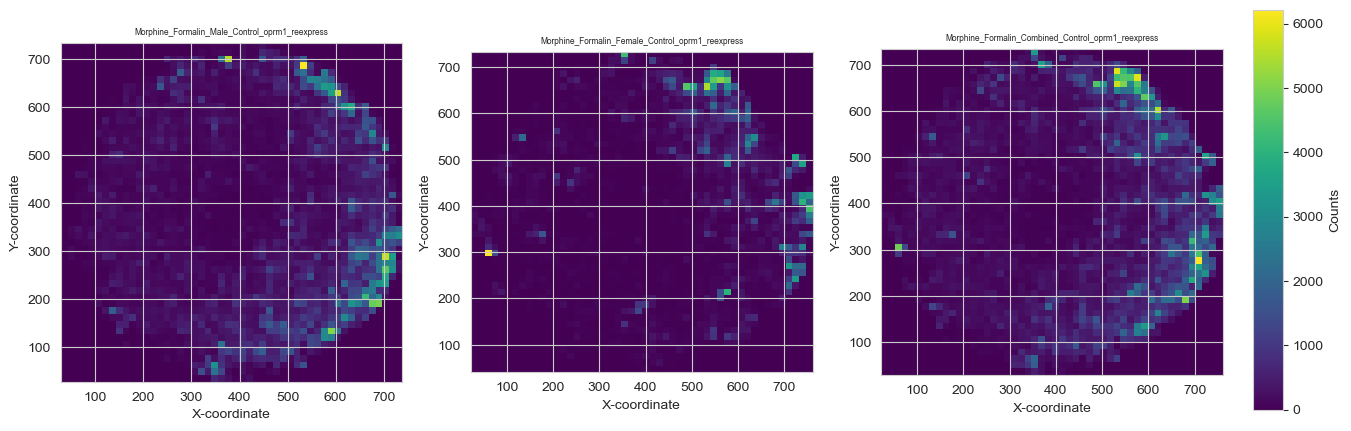

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Example pose dataset (x, y coordinates of tailbase) for selected_group_1 and selected_condition_1
project = 'oprm1_reexpress'
# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_study = 'Morphine_Formalin'
selected_condition = 'Control'

# Define the groups to compare
selected_groups = ['Male', 'Female', 'Combined']

# Create a figure for the heatmap
plt.figure(figsize=(15, 5))

# Define a colorbar
cbar_ax = plt.axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]

# Loop through selected groups and plot the heatmaps
for idx, selected_group in enumerate(selected_groups, start=1):
    # Assuming poses is a dictionary containing pose data for different groups and conditions
    # Example structure: poses[group][condition][file][frame][bodypart_idx]
    poses_selected = poses[selected_study][selected_group][selected_condition]

    # Create a list to store x and y coordinates
    x_coords = []
    y_coords = []

    for file_key in poses_selected:
        pose_data = poses_selected[file_key]
        for frame in range(1, len(pose_data)):
            x_coords.append(pose_data[frame][bodypart_idx])
            y_coords.append(pose_data[frame][bodypart_idx + 1])

    # Create a heatmap for the current group
    plt.subplot(1, len(selected_groups), idx)
    heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', interpolation='nearest')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f'{selected_study}_{selected_group}_{selected_condition}_{project}', fontsize=6)  # Change title fontsize

    # Display the heatmap
    im = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', interpolation='nearest')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title(f'{selected_group}_{selected_condition}_{project}', fontsize=6)  # Change title fontsize

    # Set number of ticks on each axis
    ax.locator_params(axis='x', nbins=10)
    ax.locator_params(axis='y', nbins=10)

# Add a colorbar
plt.colorbar(im, cax=cbar_ax, label='Counts')

# Save the figure as SVG
plt.savefig(f'../figures/behavior_distance-heatmap_{selected_study}_{selected_group}_{selected_condition}_{project}.svg', format='svg')
plt.show()


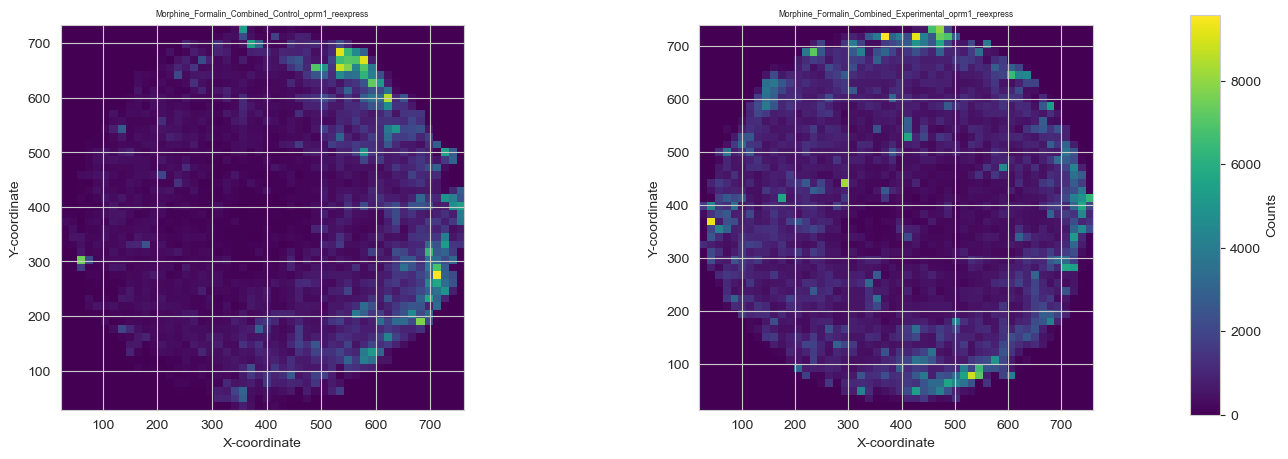

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Example pose dataset (x, y coordinates of tailbase) for selected_group_1 and selected_condition_1
project = 'oprm1_reexpress'
# Select Study-- 'Morphine' or 'Morphine_Formalin'
selected_study = 'Morphine_Formalin'
selected_group = 'Combined'
selected_conditions = ['Control', 'Experimental']

# Create a figure for the heatmap
plt.figure(figsize=(15, 5))

# Define a colorbar
cbar_ax = plt.axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]

# Loop through selected conditions and plot the heatmaps
for idx, selected_condition in enumerate(selected_conditions, start=1):
    # Assuming poses is a dictionary containing pose data for different groups and conditions
    # Example structure: poses[group][condition][file][frame][bodypart_idx]
    poses_selected = poses[selected_study][selected_group][selected_condition]

    # Create a list to store x and y coordinates
    x_coords = []
    y_coords = []

    for file_key in poses_selected:
        pose_data = poses_selected[file_key]
        for frame in range(1, len(pose_data)):
            x_coords.append(pose_data[frame][bodypart_idx])
            y_coords.append(pose_data[frame][bodypart_idx + 1])

    # Create a heatmap for the current condition
    ax = plt.subplot(1, len(selected_conditions), idx)  # Adjust subplot call
    heatmap, xedges, yedges = np.histogram2d(x_coords, y_coords, bins=50)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

    im = ax.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis', interpolation='nearest')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title(f'{selected_study}_{selected_group}_{selected_condition}_{project}', fontsize=6)  # Change title fontsize

    # Set number of ticks on each axis
    ax.locator_params(axis='x', nbins=10)
    ax.locator_params(axis='y', nbins=10)

# Add a colorbar
plt.colorbar(im, cax=cbar_ax, label='Counts')

# Save the figure as SVG
plt.savefig(f'../figures/behavior_distance-heatmap_{selected_study}_{selected_group}_{"_".join(selected_conditions)}_{project}.svg', format='svg')
plt.show()


## CUMULATIVE Distance Traveled CSV! + Figure!

/var/folders/9t/fsgf0mhs7xl9nc_xmd9v_c780000gn/T/ipykernel_48186/3980037819.py:123: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


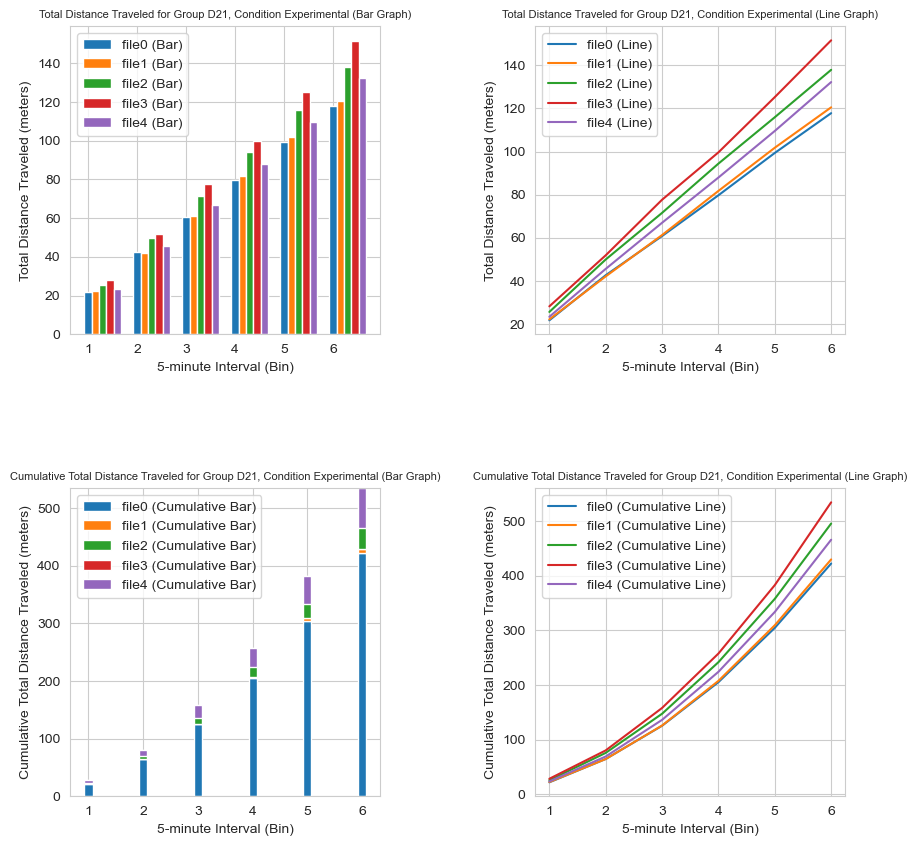

In [22]:
import csv
import numpy as np
import matplotlib.pyplot as plt

project = 'raquel'
selected_group = 'D21'
selected_condition = 'Experimental'

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Conversion factor from pixels to units
pixels_to_units = 0.000330708  # meters = 0.000330708, cm = 0.0330828
unit = 'meters'

# Number of frames representing a XX-minute interval
    # 1-minute bin = 3600
    # 2-minute bin = 7200
    # 3-minute bin = 10800
    # 5-minute bin = 18000
bin_interval = '5-minute'
frames_per_bin = 18000

# Assuming poses is a dictionary containing pose data for different groups and conditions
# Example structure: poses[group][condition][file][frame][bodypart_idx]
poses_selected = poses[selected_group][selected_condition]

##### CSV SAVE!!!
output_filename = f'../processed_dataset/behavior_distance-traveled/behavior_distance-cumulative-{unit}_{selected_group}_{selected_condition}_{project}.csv'

# Collect the file keys for all files
file_keys = list(poses_selected.keys())

with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    header = ['Bin']
    header.extend(file_keys)  # Add file keys as column headers
    writer.writerow(header)

    for frame in range(1, len(poses_selected[file_keys[0]])):
        if frame % frames_per_bin == 0:
            bin_number = frame // frames_per_bin
            row_data = [bin_number]

            for file_key in file_keys:
                pose_data = poses_selected[file_key]
                total_distance_units = 0.0
                for f in range(1, frame+1):
                    distance_pixels = np.linalg.norm(pose_data[f][bodypart_idx:bodypart_idx+2] - pose_data[f-1][bodypart_idx:bodypart_idx+2])
                    total_distance_units += distance_pixels * pixels_to_units

                row_data.append(total_distance_units)

            writer.writerow(row_data)

# Initialize a dictionary to store the total distance traveled for each file
total_distances = {file_key: [] for file_key in file_keys}

with open(output_filename, mode='r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        bin_number = int(row['Bin'])
        for file_key in file_keys:
            total_distance_units = float(row[file_key])
            total_distances[file_key].append(total_distance_units)

# Create cumulative total distance traveled
cumulative_distances = {}
for file_key in file_keys:
    cumulative_distances[file_key] = np.cumsum(total_distances[file_key])

# Create a new figure
fig, axs = plt.subplots(2, 2, figsize=(10, 10), gridspec_kw={'hspace': 0.5, 'wspace': 0.5})
bar_width = 0.15
bin_numbers = range(1, len(total_distances[file_keys[0]]) + 1)

# Create the bar graph
for file_key in file_keys:
    axs[0, 0].bar([b + bar_width * file_keys.index(file_key) for b in bin_numbers], total_distances[file_key], width=bar_width, label=f'{file_key} (Bar)')

# CHANGE AXIS LABELS FOR UNIT
axs[0, 0].set_xlabel(f'{bin_interval} Interval (Bin)')
axs[0, 0].set_ylabel(f'Total Distance Traveled ({unit})')
axs[0, 0].set_title(f'Total Distance Traveled for Group {selected_group}, Condition {selected_condition} (Bar Graph)', fontsize=8) 
axs[0, 0].set_xticks(bin_numbers)
axs[0, 0].legend()

# Create the line graph
for file_key in file_keys:
    axs[0, 1].plot(bin_numbers, total_distances[file_key], label=f'{file_key} (Line)')

# CHANGE AXIS LABELS FOR UNIT
axs[0, 1].set_xlabel(f'{bin_interval} Interval (Bin)')
axs[0, 1].set_ylabel(f'Total Distance Traveled ({unit})')
axs[0, 1].set_title(f'Total Distance Traveled for Group {selected_group}, Condition {selected_condition} (Line Graph)', fontsize=8) 
axs[0, 1].set_xticks(bin_numbers)
axs[0, 1].legend()

# Create bar graph for cumulative total distance traveled
axs[1, 0].bar(bin_numbers, cumulative_distances[file_keys[0]], label=f'{file_keys[0]} (Cumulative Bar)', width=bar_width)
for i, file_key in enumerate(file_keys[1:]):
    axs[1, 0].bar(bin_numbers, cumulative_distances[file_key] - cumulative_distances[file_keys[i]], 
                  bottom=cumulative_distances[file_keys[i]], label=f'{file_key} (Cumulative Bar)', width=bar_width)

# CHANGE AXIS LABELS FOR UNIT
axs[1, 0].set_xlabel(f'{bin_interval} Interval (Bin)')
axs[1, 0].set_ylabel(f'Cumulative Total Distance Traveled ({unit})')
axs[1, 0].set_title(f'Cumulative Total Distance Traveled for Group {selected_group}, Condition {selected_condition} (Bar Graph)', fontsize=8)  # Adjust title font size
axs[1, 0].set_xticks(bin_numbers)
axs[1, 0].legend()

# Create line graph for cumulative total distance traveled
for file_key in file_keys:
    axs[1, 1].plot(bin_numbers, cumulative_distances[file_key], label=f'{file_key} (Cumulative Line)')

# CHANGE AXIS LABELS FOR UNIT
axs[1, 1].set_xlabel(f'{bin_interval} Interval (Bin)')
axs[1, 1].set_ylabel(f'Cumulative Total Distance Traveled ({unit})')
axs[1, 1].set_title(f'Cumulative Total Distance Traveled for Group {selected_group}, Condition {selected_condition} (Line Graph)', fontsize=8)  # Adjust title font size
axs[1, 1].set_xticks(bin_numbers)
axs[1, 1].legend()

plt.tight_layout()

# Save the figure as SVG
fig.savefig(f'../figures/behavior_distance-cumulative-{unit}_{selected_group}_{selected_condition}_{project}.svg', format='svg')
plt.show()

## BINNED Distance Traveled CSV! + Figure!

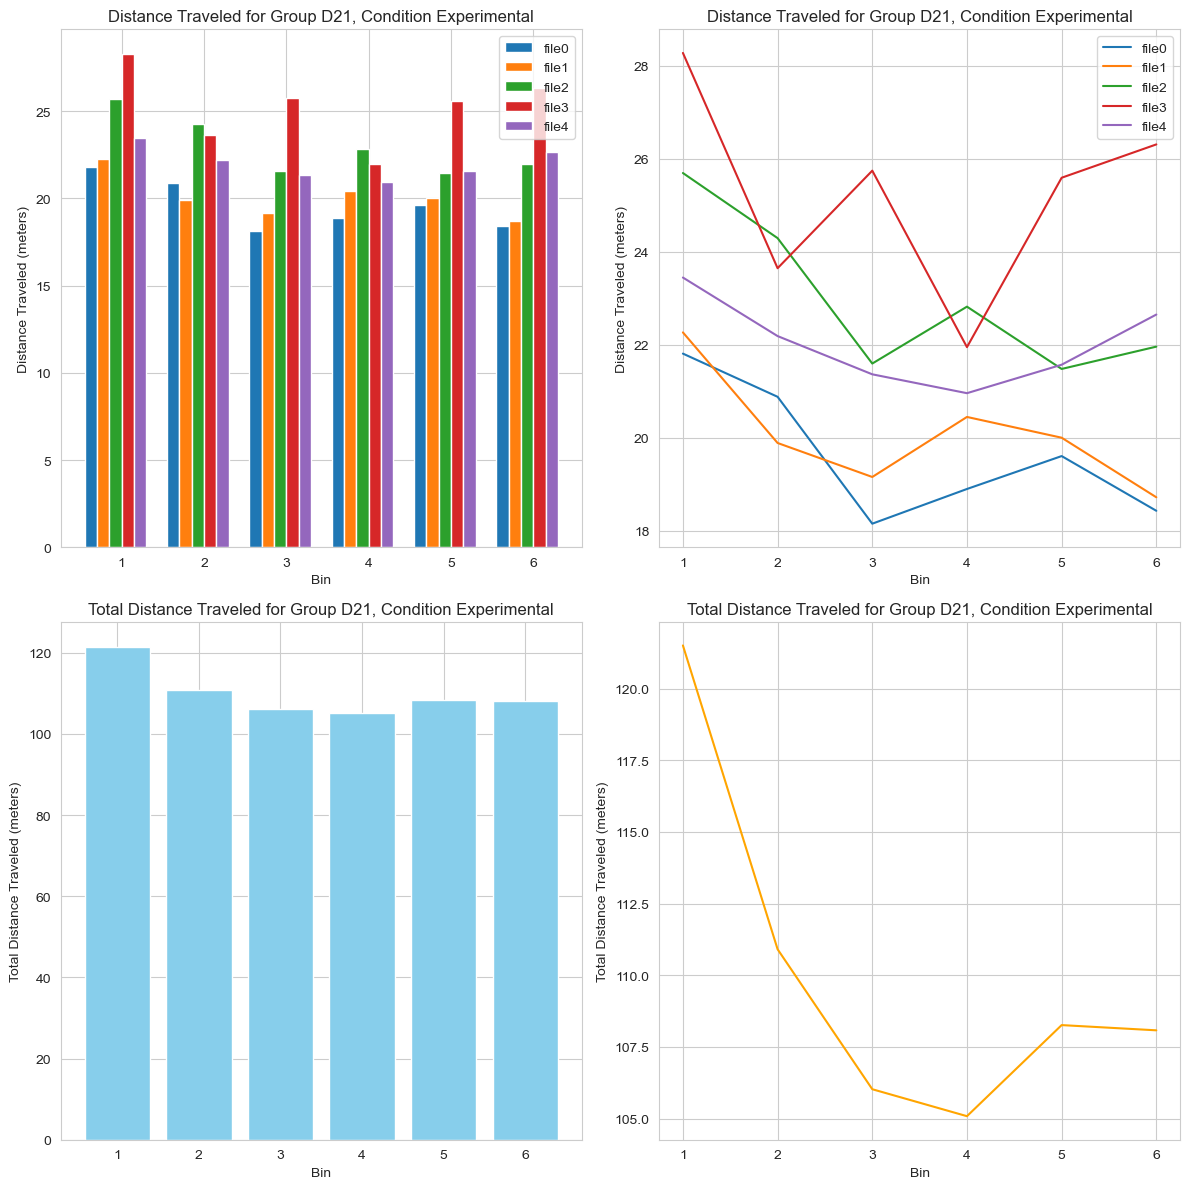

In [32]:
import csv
import numpy as np
import matplotlib.pyplot as plt

project = 'raquel'
selected_group = 'D21'
selected_condition = 'Experimental'

# Define the index of the body part representing the tailbase
bodypart_idx = 38  # Assuming tailbase x-coordinate is at index 38 and y-coordinate is at index 39

# Conversion factor from pixels to units
pixels_to_units = 0.000330708  # meters = 0.000330708, cm = 0.0330828
unit = 'meters'

# Number of frames representing a XX-minute interval
    # 1-minute bin = 3600
    # 2-minute bin = 7200
    # 3-minute bin = 10800
    # 5-minute bin = 18000
bin_interval = '5-minute'
frames_per_bin = 18000

# Assuming poses is a dictionary containing pose data for different groups and conditions
# Example structure: poses[group][condition][file][frame][bodypart_idx]
poses_selected = poses[selected_group][selected_condition]

# CSV SAVE
output_filename = f'../processed_dataset/behavior_distance-traveled/behavior_distance-binned_{unit}_{selected_group}_{selected_condition}_{project}.csv'

# Collect the file keys for all files
file_keys = list(poses_selected.keys())

# Determine the minimum number of frames among all files
min_frames = min(len(poses_selected[file_key]) for file_key in file_keys)

with open(output_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    header = ['Bin']
    header.extend(file_keys)  # Add file keys as column headers
    writer.writerow(header)

    total_distance_bins = [[] for _ in range(len(file_keys))]  # List to store total distances for each file

    for frame in range(1, min_frames):
        bin_number = frame // frames_per_bin
        row_data = [bin_number]

        for file_key in file_keys:
            pose_data = poses_selected[file_key]
            if frame >= len(pose_data):
                continue  # Skip frames that exceed the length of the file
            distance_pixels = np.linalg.norm(pose_data[frame][bodypart_idx:bodypart_idx+2] - pose_data[frame-1][bodypart_idx:bodypart_idx+2])
            distance_units = distance_pixels * pixels_to_units
            row_data.append(distance_units)
            total_distance_bins[file_keys.index(file_key)].append(distance_units)

        if frame % frames_per_bin == 0:
            writer.writerow([bin_number] + [sum(total_distance_bins[i]) for i in range(len(file_keys))])
            total_distance_bins = [[] for _ in range(len(file_keys))]  # Reset total distances for next bin

# Read the CSV file to extract the distances traveled for each bin separately
bin_distances = [[] for _ in range(len(file_keys))]  # List to store distances for each file

with open(output_filename, mode='r', newline='') as file:
    reader = csv.DictReader(file)
    for row in reader:
        for i, file_key in enumerate(file_keys):
            distance_units = float(row[file_key])
            bin_distances[i].append(distance_units)

# Calculate the sum of distances traveled among all files for each bin
total_distances = [sum(distances) for distances in zip(*bin_distances)]

# Create a new figure
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Plot for individual files
bar_width = 0.15
num_bars = len(file_keys)
for i, file_key in enumerate(file_keys):
    x_positions = np.arange(1, len(bin_distances[i]) + 1) + (i - num_bars / 2) * bar_width
    axs[0, 0].bar(x_positions, bin_distances[i], width=bar_width, label=file_key)

# CHANGE AXIS LABELS FOR UNIT
axs[0, 0].set_xlabel('Bin')
axs[0, 0].set_ylabel(f'Distance Traveled ({unit})')
axs[0, 0].set_title(f'Distance Traveled for Group {selected_group}, Condition {selected_condition}')
axs[0, 0].set_xticks(np.arange(1, len(bin_distances[0]) + 1))
axs[0, 0].set_xticklabels(np.arange(1, len(bin_distances[0]) + 1))
axs[0, 0].legend()

# Plot for total distance traveled among all files
axs[1, 0].bar(np.arange(1, len(total_distances) + 1), total_distances, color='skyblue')
axs[1, 0].set_xlabel('Bin')
axs[1, 0].set_ylabel(f'Total Distance Traveled ({unit})')
axs[1, 0].set_title(f'Total Distance Traveled for Group {selected_group}, Condition {selected_condition}')
axs[1, 0].set_xticks(np.arange(1, len(total_distances) + 1))
axs[1, 0].set_xticklabels(np.arange(1, len(total_distances) + 1))

# Plot for individual files (line graph)
for i, file_key in enumerate(file_keys):
    axs[0, 1].plot(np.arange(1, len(bin_distances[i]) + 1), bin_distances[i], label=file_key)

# CHANGE AXIS LABELS FOR UNIT
axs[0, 1].set_xlabel('Bin')
axs[0, 1].set_ylabel(f'Distance Traveled ({unit})')
axs[0, 1].set_title(f'Distance Traveled for Group {selected_group}, Condition {selected_condition}')
axs[0, 1].set_xticks(np.arange(1, len(bin_distances[0]) + 1))
axs[0, 1].set_xticklabels(np.arange(1, len(bin_distances[0]) + 1))
axs[0, 1].legend()

# Plot for total distance traveled among all files (line graph)
axs[1, 1].plot(np.arange(1, len(total_distances) + 1), total_distances, color='orange')
axs[1, 1].set_xlabel('Bin')
axs[1, 1].set_ylabel(f'Total Distance Traveled ({unit})')
axs[1, 1].set_title(f'Total Distance Traveled for Group {selected_group}, Condition {selected_condition}')
axs[1, 1].set_xticks(np.arange(1, len(total_distances) + 1))
axs[1, 1].set_xticklabels(np.arange(1, len(total_distances) + 1))

plt.tight_layout()

# Save the figure as SVG
fig.savefig(f'../figures/behavior_distance-binned_{unit}_{selected_group}_{selected_condition}_{project}.svg', format='svg')

plt.show()